In [2]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching comf_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s comf_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


In [9]:
# zentraler Stoß
def x_i(T, dt):
    N = int(T/dt)

    m1 = 5
    m2 = 5
    m3 = 5

    x1 = -5
    x2 = -2
    x3 = 1

    v_x1 = 2
    v_x2 = 0    # FIX
    v_x3 = 0

    r1 = np.sqrt(m1/PI)
    r2 = np.sqrt(m2/PI)
    r3 = np.sqrt(m3/PI)

    x_array = np.zeros((3, N+1))
    x_com_array = np.zeros((3, N+1))
    com_aray = np.zeros((N+1)) 

    com = (m1*x1+m2*x2+m3*x3) / (m1+m2+m3)
    com_aray[0] = com

    x_array[0][0] = x1
    x_array[1][0] = x2
    x_array[2][0] = x3

    x_com_array[0][0] = x1 - com
    x_com_array[1][0] = x2 - com
    x_com_array[2][0] = x3 - com

    i = 1

    # Konstante Geschwindigkeit von m1 bis Treffen auf m2
    while (x1 + r1 < x2- r2):
        x1 += v_x1*dt

        com = (m1*x1+m2*x2+m3*x3) / (m1+m2+m3)
        com_aray[i] = com

        x_array[0][i] = x1
        x_array[1][i] = x2
        x_array[2][i] = x3

        x_com_array[0][i] = x1 - com
        x_com_array[1][i] = x2 - com
        x_com_array[2][i] = x3 - com

        i += 1

    # Vollkommen elastischer Stoß von m1 auf m2
    v_x2 = v_x1 * 2*m1 / (m1 + m2)   
    v_x1 = v_x1 * (m1 - m2) / (m1 + m2)  

    # Konstante Geschwindigkeit m1 und m2 bis Treffen m2 auf m3
    while (x2 + r2 < x3- r3):
        x1 += v_x1*dt
        x2 += v_x2*dt

        com = (m1*x1+m2*x2+m3*x3) / (m1+m2+m3)
        com_aray[i] = com

        x_array[0][i] = x1
        x_array[1][i] = x2
        x_array[2][i] = x3

        x_com_array[0][i] = x1 - com
        x_com_array[1][i] = x2 - com
        x_com_array[2][i] = x3 - com

        i += 1

    # Vollkommen inelastischer Stoß von m2 auf m3
    v_x2 = v_x2 * m2 / (m2 + m3)
    v_x3 = v_x3

    # Konstante Geschwindigkeit m1 und m2+m3 bis Ende des Arrays
    while (i <= N):
        x1 += v_x1*dt
        x2 += v_x2*dt
        x3 += v_x3*dt

        com = (m1*x1+m2*x2+m3*x3) / (m1+m2+m3)
        com_aray[i] = com

        x_array[0][i] = x1
        x_array[1][i] = x2
        x_array[2][i] = x3

        x_com_array[0][i] = x1 - com
        x_com_array[1][i] = x2 - com
        x_com_array[2][i] = x3 - com

        i += 1
    
    return x_array, x_com_array

In [12]:
T = 10
dt = 0.1

#x_i(T, dt)

Note: The animations/center_of_mass_force directory was successfully created.
Output saved by creating file at animations/center_of_mass_force/moved_frame_of_reference.mp4.


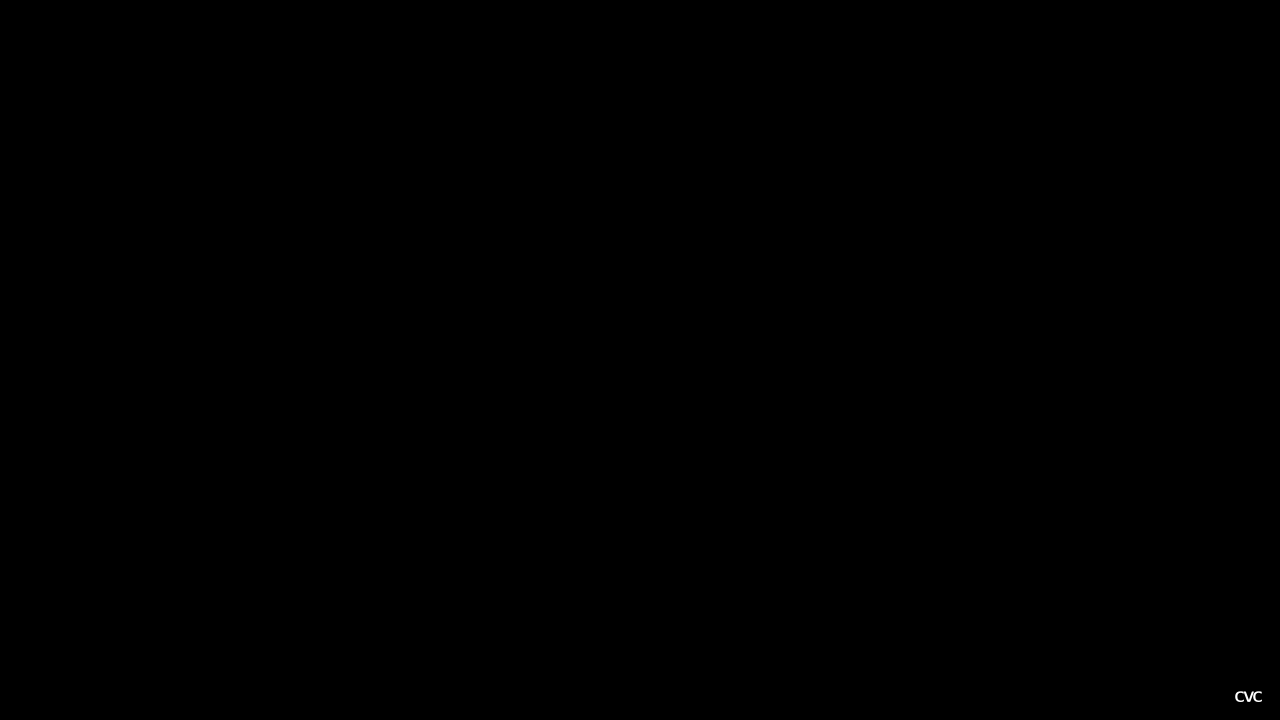

In [13]:
%%capture_video --path "animations/center_of_mass_force/moved_frame_of_reference.mp4"
%%manim -qm --fps 20 $video_scene

class comf_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)